<a href="https://colab.research.google.com/github/Shreyaprashanth/Samsung__Innovation__Campus/blob/main/SouthAfricaCrimeStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kagglehub

In [2]:
import kagglehub
import pandas as pd
import os
###############################################################
# Specify the dataset identifier (user/dataset-name) and the file within the dataset
dataset_owner = "slwessels"
dataset_name = "crime-statistics-for-south-africa"
dataset_handle = f"{dataset_owner}/{dataset_name}"
###############################################################
# Download the dataset to a local directory
local_path = kagglehub.dataset_download(dataset_handle)
###############################################################
# List the contents of the downloaded directory to find the correct file path
print(f"Dataset downloaded to: {local_path}")
###############################################################
print("Contents of the dataset:")
###############################################################
for root, dirs, files in os.walk(local_path):
    level = root.replace(local_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')
###############################################################
# Once you find the correct file path, replace "crime_statistics.csv"
# with the correct path and uncomment the line below to load the data into a DataFrame.
file_path_within_dataset = "SouthAfricaCrimeStats_v2.csv"
###############################################################
df = pd.read_csv(os.path.join(local_path, file_path_within_dataset))
###############################################################
# display(df.head())
df.head()

100%|██████████| 15.3M/15.3M [00:01<00:00, 15.5MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/slwessels/crime-statistics-for-south-africa/versions/2
Contents of the dataset:
2/
    Police_bounds.prj
    Police_bounds.shx
    ProvincePopulation.csv
    Police_bounds.dbf
    Police_points.prj
    Police_points.shp
    SouthAfricaCrimeStats_v2.csv
    Police_points.dbf
    Police_bounds.shp
    Police_points.shx


,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


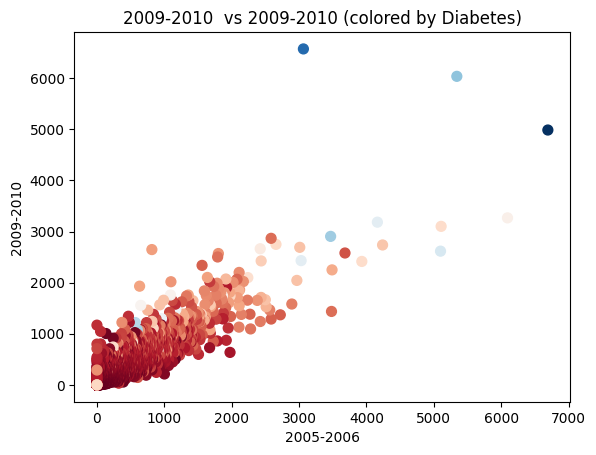

In [3]:
import matplotlib.pyplot as plt

X, y = df[['2005-2006', '2009-2010']].values, df['2015-2016'].values

# Create the scatter plot similar to the make_blobs example
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
plt.xlabel('2005-2006')
plt.ylabel('2009-2010')
plt.title('2009-2010  vs 2009-2010 ')
plt.show()

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [6]:
import numpy as np
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

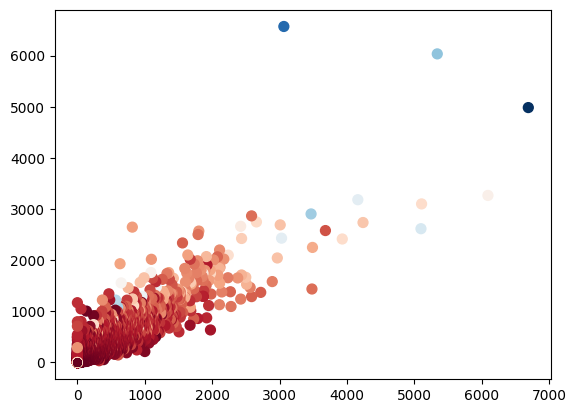

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [8]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.81, 0.02, 0.05, ..., 0.  , 0.  , 0.  ],
       [0.31, 0.  , 0.13, ..., 0.  , 0.  , 0.  ],
       [0.33, 0.  , 0.22, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.75, 0.  , 0.08, ..., 0.  , 0.  , 0.  ],
       [0.57, 0.29, 0.05, ..., 0.  , 0.  , 0.  ],
       [0.41, 0.  , 0.19, ..., 0.  , 0.  , 0.  ]])

In [9]:
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [10]:
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import GridSearchCV

    # Define the parameter grid
    param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

    # Create a Gaussian Naive Bayes classifier
    model = GaussianNB()

    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X, y)

    # Get the best parameter and best score
    print(f"Best var_smoothing: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best var_smoothing: {'var_smoothing': 1e-05}
Best score: 0.198312046932794
